In [1]:
# import pandas as pd
# import glob
# import numpy as np
# import pickle as pkl
# import matplotlib.pyplot as plt
# from tqdm import tqdm

# # gensim
# import gensim
# from gensim.utils import simple_preprocess
# from gensim.models import LdaModel


In [2]:
# load model
fname = 'ldamodel_output_hiddenstories'
lda_model = LdaModel.load(fname)

In [3]:
# define plotting colors
import matplotlib.colors as mcolors

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
# colorz=[color for name, color in mcolors.TABLEAU_COLORS.items()]

# define topic names
labels = ['Precipitation Extremes & Distributions',
          'Climate Change',
          'River Networks, Topography, & Scaling',
          'Hydrogeology',
          'Forecasting',
          'Energy Balance (Hydrometeorology, Land Surface)',
          'Snow and Ice',
          'Sediment & Erosion',
          'Water Resources Management',
          'Hydrogeomorphology',
          'Uncertainty and Calibration',
          'Statistical Hydrology',
          'Quality & Transport',
          'Miscellaneous',
          'Soil Moisture',
          'Floods and Discharge',
          'Precipitation Trends & Climatology']

In [4]:
# load raw corpus dataframe
with open('corpus_raw.pkl', 'rb') as f:
    corpus_df = pkl.load(f)
    
# load cleaned corpus
with open('corpus_hiddenstories.pkl', 'rb') as f:
    corpus = pkl.load(f)[0]

In [5]:
# run the model
doc_lda = lda_model[corpus]

In [6]:
# grab the topic probabilities for each paper

# init storage
hm = np.zeros([len(corpus), lda_model.num_topics])

# loop over papers
for paper in tqdm(range(len(corpus))):
    pairs = lda_model[corpus[paper]][0]
    for pair in pairs:
        hm[paper, pair[0]] = pair[1]

100%|██████████| 45686/45686 [03:00<00:00, 252.44it/s]


In [16]:
print(hm[1][2])

0.024660997092723846


In [9]:
# create correlation time series

# all years where we have data
years = np.unique(corpus_df['Year'])

# init storage (as a dictionary)
correlations_years = np.zeros([len(years), lda_model.num_topics, lda_model.num_topics])

# all correlations
correlations = np.corrcoef(np.transpose(hm)) 

# correlations by time
y = -1
for year in years:
    y = y+1
    
    # extract all papers in this year
    hm_year = hm[corpus_df['Year'] == year,:]

    # calculate topic popularity for this year
    correlations_years[y,:,:] = np.corrcoef(np.transpose(hm_year)) 

In [10]:
# init storage
links = pd.DataFrame(columns = ['source','target','value','n_value','p_value'])

# fill out links dataframe
row = -1
for i in range(hm.shape[1]):
    for j in range(i,hm.shape[1]):
        if not (i==j):
            row = row+1
            links.loc[row,'source'] = j    
            links.loc[row,'target'] = i
            links.loc[row,'n_value'] = np.max([0, -correlations[i,j]*100])
            links.loc[row,'p_value'] = np.max([0, correlations[i,j]*100])

links.value = links.p_value

# change data type
links = links.astype('int64')

In [11]:
# init storage
nodes = pd.DataFrame(columns = ['group','name'])

# fill out nodes dataframe
row = -1
for i in range(hm.shape[1]):
    row = row+1
    nodes.loc[row,'name'] = labels[i] 
    nodes.loc[row,'group'] = 0 

# change data type
nodes.group = nodes.group.astype('int64')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
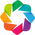

:Chord   [source,target]   (value,n_value,p_value)

In [12]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data

hv.extension('bokeh')
hv.output(size = 200)

# hv.Chord(links)

# nodes = hv.Dataset(pd.DataFrame(nodes), 'index')
# nodes.data.head()

# plot positive correlations
links.value = links.p_value
chord = hv.Chord((links, hv.Dataset(pd.DataFrame(nodes), 'index'))).select(value=(5, None))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', 
               edge_color=dim('source').str(), 
               labels='name', 
               node_color=dim('index').str()))
# plt.title('Positive Correlations', fontsize=22)
# plt.savefig(f'figures/chord_diagram_positive.png')




In [13]:
# plot negative correlations
links.value = links.n_value
chord = hv.Chord((links, hv.Dataset(pd.DataFrame(nodes), 'index'))).select(value=(15, None))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', 
               edge_color=dim('source').str(), 
               labels='name', 
               node_color=dim('index').str()))
# plt.title('Negative Correlations', fontsize=22)
# plt.savefig(f'figures/chord_diagram_negative.png')
# hv.save(chord, 'penguin_plot.png')

:Chord   [source,target]   (value,n_value,p_value)